# Building and applying a classification model

Use error metrics to explore the parameter space of your neural network classifier.

For this exercise you will use the ‘wine’ dataset available as a sci-kit learn dataset, and the multi-layer perceptron classifier (MLPClassifier). 

In [1]:
# Import packages

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
wine = load_wine()

wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Part 1 (10 points): Model construction
Following the method that we have discussed in class, build an MLPClassifier model to predict the target variable from the feature data. 

In [5]:
# Split the data into train and test (80-20 split)

X = wine.data
y = wine.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 14)

In [6]:
# Scale the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
stand_X = scaler.transform(X_train)
stand_X_test = scaler.transform(X_test)

In [7]:
# Just to check that these are the right size/shape

print(stand_X.shape)
print(stand_X_test.shape)

(142, 13)
(36, 13)


In [8]:
# Make our model and fit it

# hidden_layer_sizes = (number of neurons in each layer) so (5,5,5) is five neurons in 3 layers
# random state to make things reproducable
# max_iter = maximum iterations

mlp_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=300, random_state=14)

mlp_model.fit(stand_X,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=14)

In [9]:
# Use our fit model to predict new classifications
y_pred = mlp_model.predict(stand_X_test)

In [10]:
# Look at the accuracy

print('Accuracy score =', metrics.accuracy_score(y_test, y_pred))

Accuracy score = 1.0


In [11]:
metrics.confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [12]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36




## Part 2 (30 points): Explore hyperparameter space
You will explore the parameter space of the MLPClassifier model and determine the combination(s) of number of layers and number of neurons that yield the best model accuracy score. 



In [13]:
# Use nested for loops to find what number of layers and neurons is the best

# make an empty list for accuracy scores
acc = []
layer = []
neuron = []

neurons = range(1,11)
layers = range(1,11)

for n in neurons:
    for l in layers:
        lay = np.tile(n,l)
        mlp_model = MLPClassifier(hidden_layer_sizes=lay, max_iter = 500, random_state=14)
        mlp_model.fit(stand_X,y_train)
        y_pred = mlp_model.predict(stand_X_test)
        acc.append(metrics.accuracy_score(y_test, y_pred))
        layer.append(l)
        neuron.append(n)
        

/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/li

/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Emma/opt/anaconda3/li

I started with looping through 20 neurons and 20 layers, but that yielded very similar results for all neurons above 10, and poor results for all layers above 12 or 13, so I reran the loop for 10 neurons and 10 layers to produce a smaller dataset to look at the higher accuracy scores. This smaller loop will show optimized results, while also preventing overfitting with the higher number of layers or neurons. 


In [14]:
# Just to look and make sure the accuracy scores are there
acc

[0.7777777777777778,
 0.7777777777777778,
 0.4444444444444444,
 0.7777777777777778,
 0.4444444444444444,
 0.3888888888888889,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.16666666666666666,
 0.75,
 0.8055555555555556,
 0.5833333333333334,
 0.5555555555555556,
 0.5833333333333334,
 0.5555555555555556,
 0.8888888888888888,
 0.4444444444444444,
 0.5555555555555556,
 0.16666666666666666,
 1.0,
 0.5555555555555556,
 0.4444444444444444,
 0.5833333333333334,
 0.7777777777777778,
 0.4444444444444444,
 0.4444444444444444,
 0.16666666666666666,
 0.4444444444444444,
 0.4444444444444444,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 1.0,
 0.5555555555555556,
 0.4444444444444444,
 0.16666666666666666,
 0.3888888888888889,
 0.4444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.6111111111111112,
 0.9444444444444444,
 1.0,
 0.4444444444444444,
 0.9444444444444444,
 0.6111111111111112,
 0.8055555555555556,
 0.6111111111111112,
 0.94

In [15]:
data = pd.DataFrame(list(zip(layer, neuron, acc)),
                   columns=['Layers','Neurons','Accuracy Score'])

data

,Layers,Neurons,Accuracy Score
0,1,1,0.777778
1,2,1,0.777778
2,3,1,0.444444
3,4,1,0.777778
4,5,1,0.444444
...,...,...,...
95,6,10,1.000000
96,7,10,0.972222
97,8,10,0.944444
98,9,10,0.944444


* Produce a figure that illustrates the results of your analysis. Write a short paragraph explaining your results. If more than one combination of layers/neurons results in a high accuracy score (>0.9), discuss which combination of layers/neurons you would use and why.


(0.55, 10.45, 0.55, 10.45)

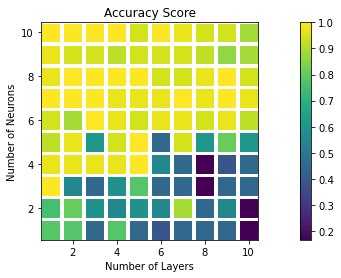

In [16]:
plt.scatter(layer, neuron, c = acc, marker = 's', s = 300)
plt.xlabel('Number of Layers')
plt.ylabel('Number of Neurons')
plt.title('Accuracy Score')
plt.colorbar()

plt.axis('square')

In [17]:
# Drop any values below 0.9 since we only care about that
highscore = data[data['Accuracy Score']>=0.9]
highscore.reset_index(drop = True) 
highscore.dtypes

Layers              int64
Neurons             int64
Accuracy Score    float64
dtype: object

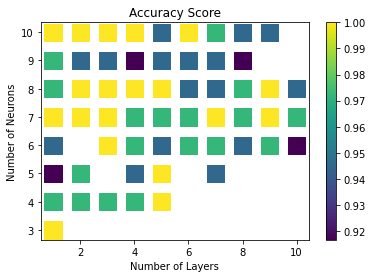

In [18]:
# Replotting to only show anything above 0.9, just to see it better

plt.scatter(highscore['Layers'], highscore['Neurons'], c = highscore['Accuracy Score'], marker = 's', s = 300)
plt.xlabel('Number of Layers')
plt.ylabel('Number of Neurons')
plt.title('Accuracy Score')
plt.colorbar()

The figures show that as number of layers increase, the accuracy score tends to decrease. As number of neurons increases, the accuracy score increases, with varying results for different number of layers. Since there are multiple options that yield an accuracy score above 0.9, I chose to create a model with 1 layer and 3 neurons. This has the lowest set of combined parameters (layers and neurons), while also the highest accuracy score (1.0). Other combinations of layers and neurons also yield an accuracy score of 1.0, but I am choosing the one with the lowest amount of layers and neurons to prevent overfitting the model. 

* For each combination of layers/neurons that yields an accuracy score > 0.9, calculate the confusion matrix, precision, recall and f1-score for each target class. Describe the implications of your results for model performance for each target class and choose which layers/neurons you will use in the final version of your model.

In [19]:
# Calculate the confusion matrix and classification report for each option

for index, row in highscore.iterrows():
    neu = int(row['Neurons'])
    ls = int(row['Layers'])
    lay = np.tile(neu,ls)
    mlp_model = MLPClassifier(hidden_layer_sizes=lay, max_iter = 500, random_state=14)
    mlp_model.fit(stand_X,y_train)
    y_pred = mlp_model.predict(stand_X_test)
    print('Neurons:',neu,' and Layers:',ls, 'lay variable', lay)
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))

/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 3  and Layers: 1 lay variable [3]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 4  and Layers: 1 lay variable [4]
[[14  0  0]
 [ 0 16  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.83      0.91         6

    accuracy                           0.97        36
   macro avg       0.98      0.94      0.96        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 4  and Layers: 2 lay variable [4 4]
[[14  0  0]
 [ 0 16  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.83      0.91         6

    accuracy                           0.97        36
   macro avg       0.98      0.94      0.96        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 4  and Layers: 3 lay variable [4 4 4]
[[14  0  0]
 [ 0 16  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.83      0.91         6

    accuracy                           0.97        36
   macro avg       0.98      0.94      0.96        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 4  and Layers: 4 lay variable [4 4 4 4]
[[14  0  0]
 [ 0 16  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.83      0.91         6

    accuracy                           0.97        36
   macro avg       0.98      0.94      0.96        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 4  and Layers: 5 lay variable [4 4 4 4 4]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 5  and Layers: 1 lay variable [5]
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.81      0.90        16
           2       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 5  and Layers: 2 lay variable [5 5]
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 5  and Layers: 4 lay variable [5 5 5 5]
[[13  1  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      0.94      0.94        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 5  and Layers: 5 lay variable [5 5 5 5 5]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 5  and Layers: 7 lay variable [5 5 5 5 5 5 5]
[[13  1  0]
 [ 1 15  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.96      0.96        36
weighted avg       0.94      0.94      0.94        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 6  and Layers: 1 lay variable [6]
[[13  1  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      0.94      0.94        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36

Neurons: 6  and Layers: 3 lay variable [6 6 6]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 6  and Layers: 4 lay variable [6 6 6 6]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 6  and Layers: 5 lay variable [6 6 6 6 6]
[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.88      0.93        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36

Neurons: 6  and Layers: 6 lay variable [6 6 6 6 6 6]
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 6  and Layers: 7 lay variable [6 6 6 6 6 6 6]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 6  and Layers: 8 lay variable [6 6 6 6 6 6 6 6]
[[14  0  0]
 [ 2 14  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.96      0.96        36
weighted avg       0.95      0.94      0.94        36

Neurons: 6  and Layers: 9 lay variable [6 6 6 6 6 6 6 6 6]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 6  and Layers: 10 lay variable [6 6 6 6 6 6 6 6 6 6]
[[14  0  0]
 [ 0 13  3]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.67      1.00      0.80         6

    accuracy                           0.92        36
   macro avg       0.89      0.94      0.90        36
weighted avg       0.94      0.92      0.92        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 7  and Layers: 1 lay variable [7]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 7  and Layers: 2 lay variable [7 7]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons: 7  and Layers: 3 lay variable [7 7 7]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons: 7  and Layers: 4 lay variable [7 7 7 7]
[[14  0  0]
 [ 0 16  0]

/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 7  and Layers: 5 lay variable [7 7 7 7 7]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

Neurons: 7  and Layers: 6 lay variable [7 7 7 7 7 7]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

Neurons: 7  and Layers: 7 lay variable [7 7 7 7 7 7 7]
[[14 

/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 7  and Layers: 8 lay variable [7 7 7 7 7 7 7 7]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36

Neurons: 7  and Layers: 9 lay variable [7 7 7 7 7 7 7 7 7]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 7  and Layers: 10 lay variable [7 7 7 7 7 7 7 7 7 7]
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 8  and Layers: 1 lay variable [8]
[[13  1  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 8  and Layers: 2 lay variable [8 8]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 8  and Layers: 3 lay variable [8 8 8]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons: 8  and Layers: 4 lay variable [8 8 8 8]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons: 8  and Layers: 5 lay variable [8 8 8 8 8]
[[14  0  0]
 [ 0 

/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 8  and Layers: 6 lay variable [8 8 8 8 8 8]
[[12  2  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.89      1.00      0.94        16
           2       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

Neurons: 8  and Layers: 7 lay variable [8 8 8 8 8 8 8]
[[14  0  0]
 [ 1 15  0]
 [ 1  0  5]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.94      0.97        16
           2       1.00      0.83      0.91         6

    accuracy                           0.94        36
   macro avg       0.96      0.92      0.94        36
weighted avg       0.95      0.94      0.94        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 8  and Layers: 8 lay variable [8 8 8 8 8 8 8 8]
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 8  and Layers: 9 lay variable [8 8 8 8 8 8 8 8 8]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons: 8  and Layers: 10 lay variable [8 8 8 8 8 8 8 8 8 8]
[[14  0  0]
 [ 0 14  2]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93        16
           2       0.75      1.00      0.86         6

    accuracy                           0.94        36
   macro avg       0.92      0.96      0.93        36
weighted avg       0.96      0.94      0.95        36



/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 9  and Layers: 1 lay variable [9]
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Neurons: 9  and Layers: 2 lay variable [9 9]
[[14  0  0]
 [ 1 15  0]
 [ 0  1  5]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.94      0.94      0.94        16
           2       1.00      0.83      0.91         6

    accuracy                           0.94        36
   macro avg       0.96      0.92      0.94        36
weighted avg       0.95      0.94      0.94        36

Neurons: 9  and Layers: 3 lay variable [9 9 9]
[[14  0  0]
 [ 2 14  0]
 [ 0 

/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 10  and Layers: 1 lay variable [10]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons: 10  and Layers: 2 lay variable [10 10]
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Neurons: 10  and Layers: 3 lay variable [10 10 10]
[[14  0  0]
 [ 0 16 

Looking at all the options, 1 layer with 3 neurons produces a perfect accuracy score and confusion matrix, while also minimizing the overfitting that will occur. In that model, all target classes (0, 1, and 2) have a precision of 1 and a recall of 1, thus also producing an f1-score of 1. Thus, everything that was supposed to be predicted as a class 0 was predicted as class 0, and so on for classes 1 and 2. There are other layer/neuron combinations that have precision, recall, and f1-scores of 1.0, but a lower number of neurons and layers will prevent overfitting the model. 

In [22]:
# Build the final model
final_model = MLPClassifier(hidden_layer_sizes=[3], max_iter = 500, random_state=14)
final_model.fit(stand_X, y_train)
y_predicted = final_model.predict(stand_X_test)

print('Accuracy score =', metrics.accuracy_score(y_test, y_predicted))

Accuracy score = 1.0


/Users/Emma/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Part 3 (20 points): Apply your tuned model
Use the final version of your model, developed using the steps above, to predict the class for the ‘unknown’ samples found in the `unknown_wine.csv` file. 

Find a scikit-learn function that will give the probability that each unknown wine fits into each of one of the three target classes. List the probabilities for each unknown sample for each target class and comment on your results.

In [23]:
unknown = pd.read_csv('../Data/unknown_wine.csv')

unknown

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.480115,1.577093,1.766757,7.542816,43.456511,0.569810,0.075239,0.267335,0.744527,0.975456,0.741519,2.763938,1228.781864
1,1.074171,1.125832,2.557246,4.421963,57.339151,1.677453,1.027255,0.266734,1.037521,6.093875,0.400008,2.629353,620.263632
2,3.516777,0.819709,0.462774,2.328977,60.776751,0.950360,2.312480,0.114245,1.453748,1.566772,0.249111,0.948954,417.939695
3,13.189798,1.402826,0.153316,7.621558,0.440191,0.103332,2.878385,0.016165,1.558074,5.961709,0.338151,1.608835,233.606713
4,11.973053,1.838887,0.945975,1.269000,83.484182,0.934233,0.448263,0.038872,0.488293,4.358916,0.482324,0.084788,387.198226
5,2.284138,0.048992,0.211198,4.088945,18.957613,1.192519,1.647511,0.005231,1.038589,2.101098,0.237541,1.672787,121.134473
6,9.463899,0.787199,1.863438,16.869074,31.736868,1.470403,0.534720,0.206582,0.633736,4.444610,0.033384,0.925355,328.508943
7,6.453939,1.676532,2.153574,13.765152,70.390073,1.749210,2.721021,0.252128,0.152867,0.582114,0.507068,2.055239,59.729064
8,12.740552,2.854646,0.932969,8.626371,44.557706,0.405552,1.105890,0.219005,0.393723,2.706763,0.983953,1.070769,250.301469
9,9.686586,1.232883,1.475132,3.560106,12.221049,1.229565,1.495698,0.153813,0.886209,1.506817,0.939698,0.921325,187.457035


In [24]:
# Scale the data with the same scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
stand_X_uk = scaler.transform(unknown)

In [31]:
# predict the classes for the unknown data
unknown_pred = final_model.predict(stand_X_uk)
unknown_pred

array([1, 2, 1, 1, 2, 1, 2, 1, 1, 1])

In [30]:
# Find the probability of each potential prediction

predictions = final_model.predict_proba(stand_X_uk)
print(predictions)

[[1.90895921e-01 6.39886730e-01 1.69217349e-01]
 [2.02960156e-01 2.69286371e-01 5.27753473e-01]
 [5.45669762e-02 9.38187170e-01 7.24585373e-03]
 [2.21652394e-03 9.97776834e-01 6.64200371e-06]
 [2.31917756e-01 2.46478006e-01 5.21604238e-01]
 [1.68500354e-02 9.82608144e-01 5.41820763e-04]
 [2.02960156e-01 2.69286371e-01 5.27753473e-01]
 [1.05222596e-01 8.61718894e-01 3.30585101e-02]
 [1.53583027e-02 9.84199072e-01 4.42625605e-04]
 [2.49673929e-02 9.73751785e-01 1.28082167e-03]]


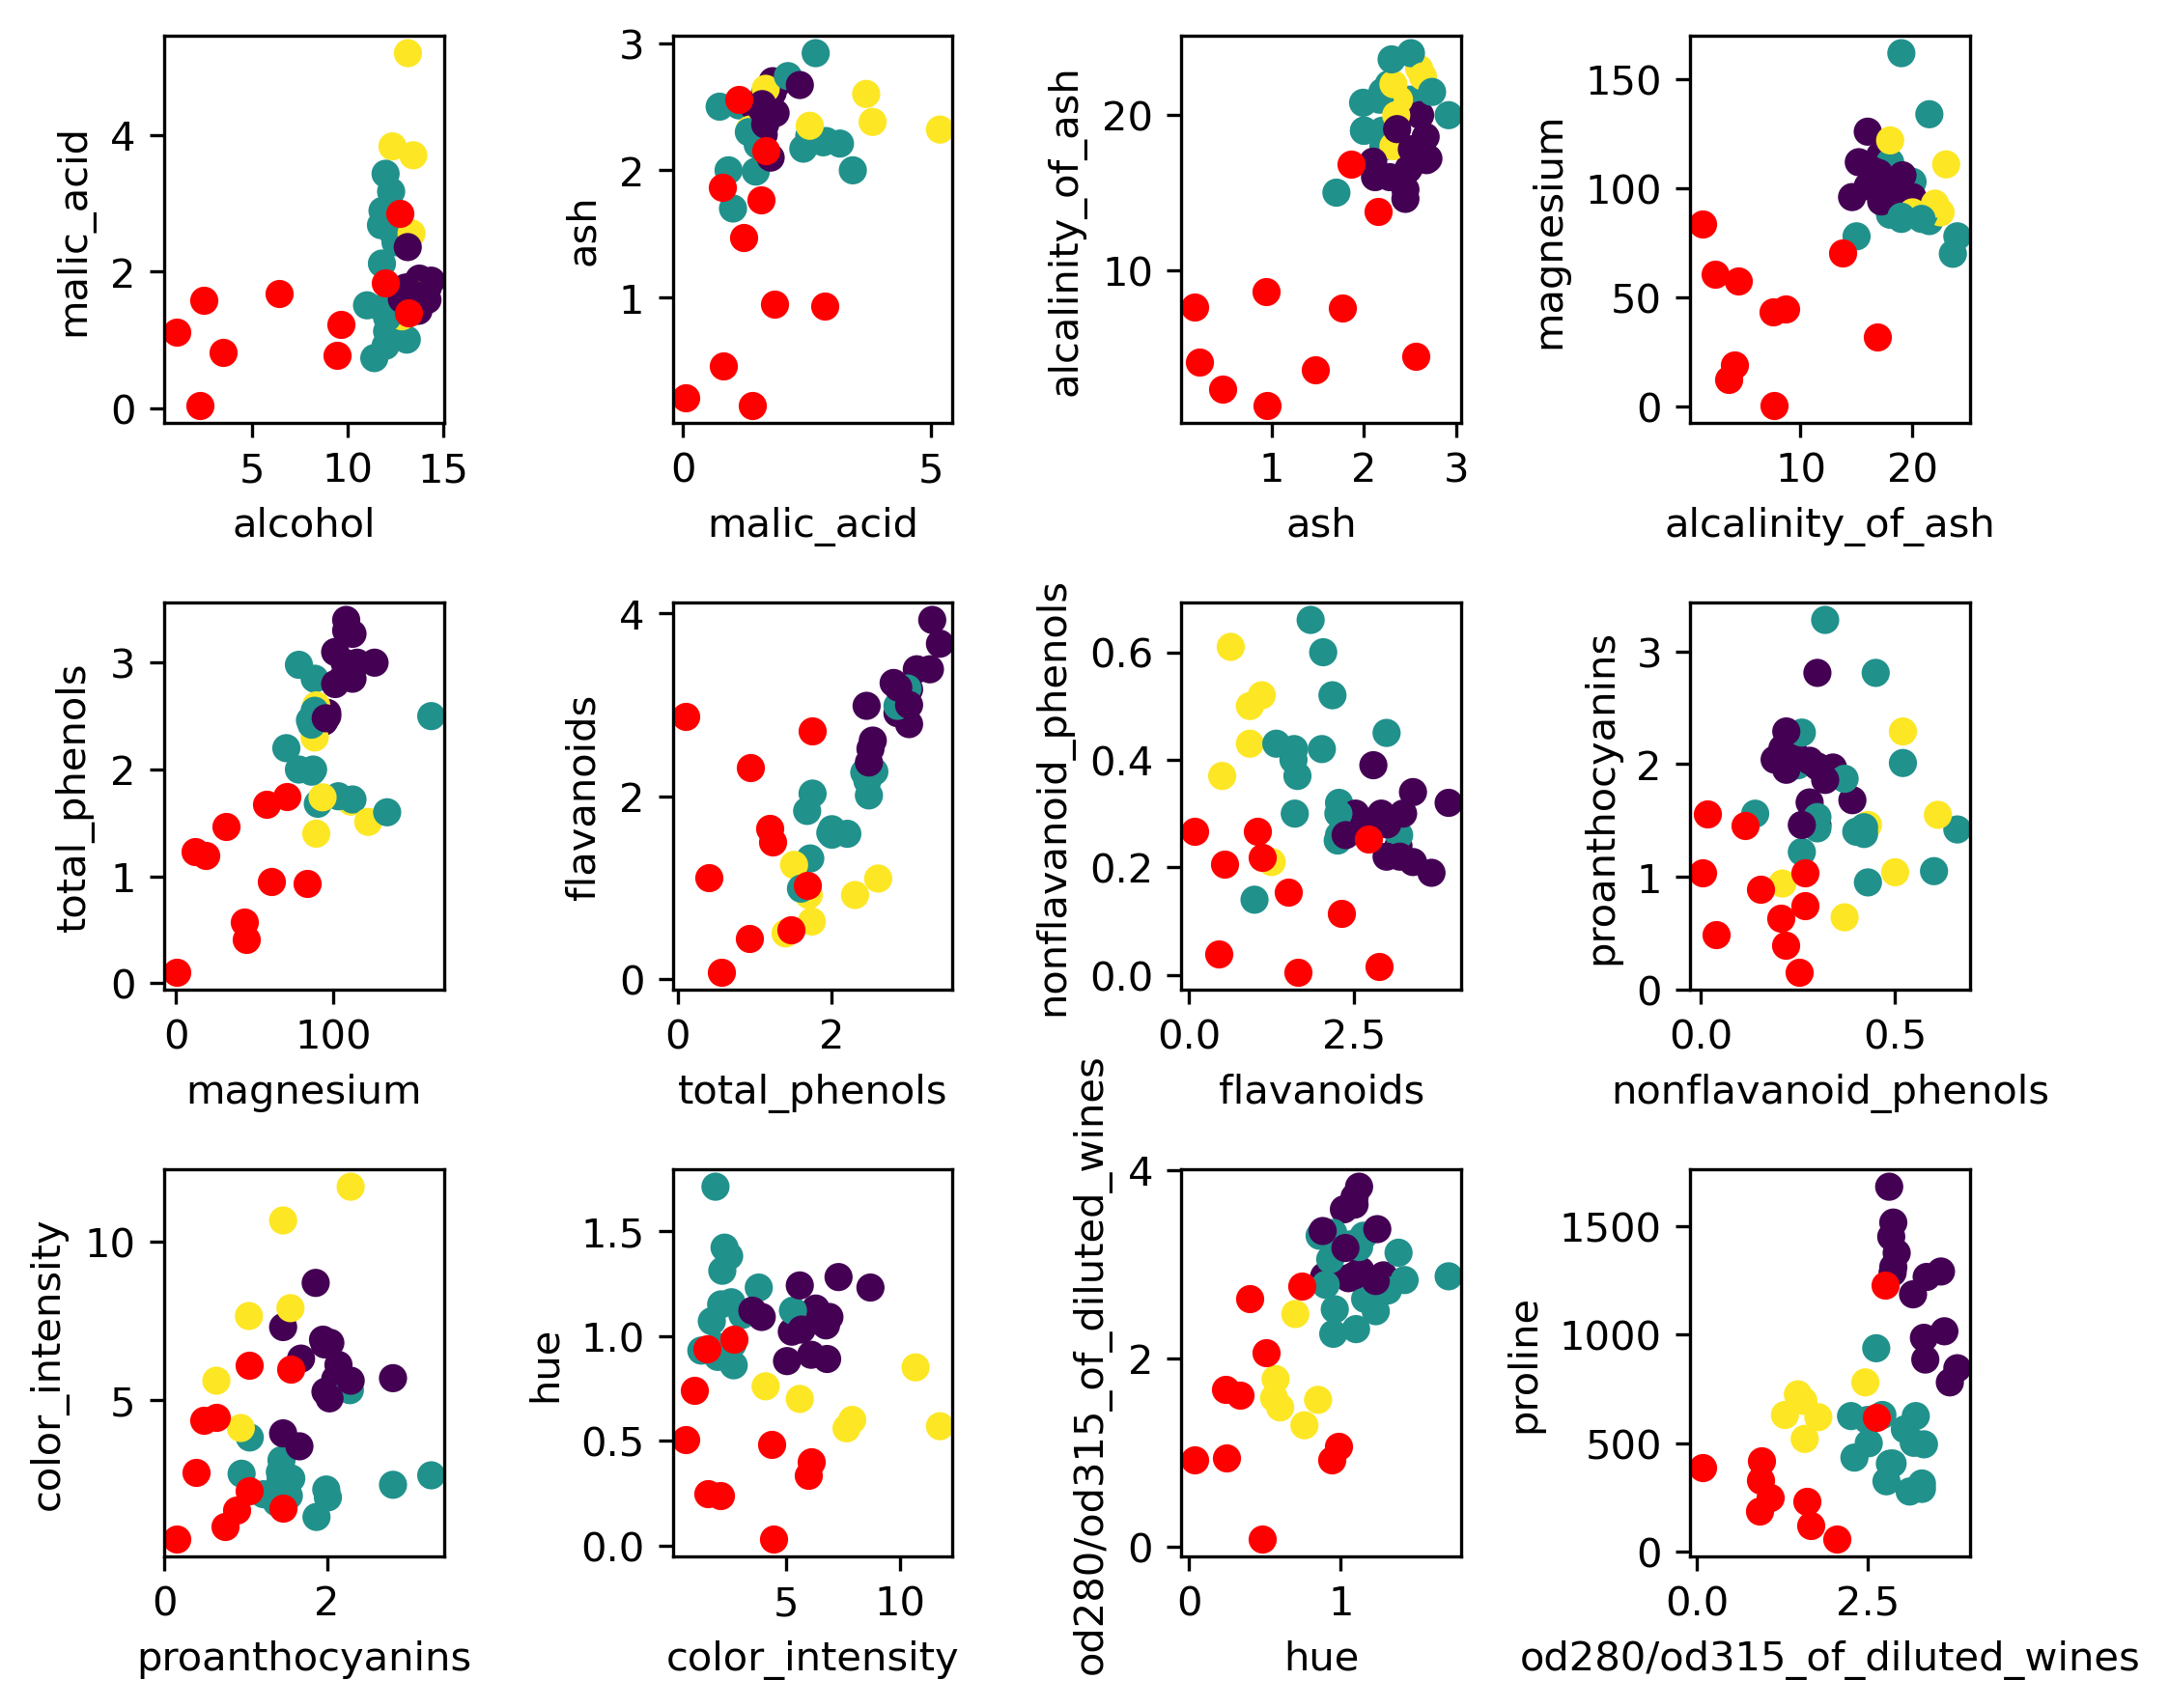

In [72]:
# take a quick look at the data
import matplotlib.pyplot as plt

# Set three rows and two columns
nrows, ncols = 3, 4
# Then make the figure object
fig = plt.figure(figsize = (7,6), dpi = 300)

# For loop that goes 
for i in range(1, 13):
    # Add subplot and tell it where to go
    ax = fig.add_subplot(nrows, ncols, i)
    PltScat = ax.scatter(X_test[:,i-1], X_test[:,i], c = y_predicted)
    ax.plot(unknown.iloc[:,i-1], unknown.iloc[:,i], 'or' )
    
    # Add the legend by un-commenting these lines, it adds a legend to each chart though so it makes it a lot
    # Label=wine.target_names
   #  plt.legend(PltScat.legend_elements()[0],Label,prop = {'size' : 9})
    # Label the axes so we know what we are looking at
    ax.set_xlabel(wine.feature_names[i-1])
    ax.set_ylabel(wine.feature_names[i])

plt.tight_layout()
plt.show()

Of the 10 unknowns, 7 were predicted to be class 1 and 3 were predicted to be class 2. None were predicted to be class 0. When looking at the probability of each, we can see that all have low probability of class 0, and the 7 that were distinguished as class 1 are higher for class 1 and the same is true of those that were found to be class 2 being class 2. 6 of the unknowns had a very high probability of being class 1. The 6th unknown had a pretty close probability of being any of the three classes. Overall, most have a low probabilty of being class 0 and a medium probability of being class 2, and a high (unless outweighed by class 2) probability of being class 1. This can be seen in the figure above. Red is the unknowns, purple is class 0, green is class 1, and yellow is class 2. It looks like none of the red dots are close to being classified as class 0, which visually confirms our statistics. 